# III. Exercice : Le neurone

## 1. Modèle Integrate-and-Fire

Considérons un neurone "Integrate-and-Fire" décrit par l'équation suivante
$$\tau \frac{dV}{dt} = -V + RI.$$
Ici, $V$ est le potentiel de la membrane, $\tau$ est la constante de temps de la membrane, $R$ la résistance d'entrée, et $I$ représente un courant injecté dans le neurone. 
Considérons les paramètres: $\tau=20$ ms, $R=1$, $\Theta=20$.

## E1.1 Solution analytique du modèle Integrate-and-Fire

Quel est le potentiel de la membrane de repos - ou le point fixe - (pour $t\rightarrow \infty$) du neurone décrit ci-dessus? <br>Vérifiez que $$V(t) = RI + (V_0 - RI) \exp(-t/\tau)$$ est une solution de l'équation différentielle ($V_0 = V(t=0)$). <br>
**Indice**: Rappelez que $\frac{d}{dt} \left( e^{f(t)} \right) = e^{f(t)} \frac{df(t)}{dt}$

## S1.1 
Le potentiel de repos :
$$\frac{dV}{dt} = 0 = -V_{repo} + RI$$ <br>
$$\rightarrow \,\, V_{repo} = RI$$

Verification de la solution aux points extrêmes : 
$$ V(t=0) = V_0$$  
$$ V(t\rightarrow \infty) = RI$$ 

Vérification ultime: utiliser la solution dans l'équation différentielle:

$$\tau \frac{dV}{dt} = -V + RI$$
$$\rightarrow \tau (-\frac{1}{\tau}) (V_0 - RI)\exp(-t/\tau)) = -RI - (V_0 - RI) \exp(-t/\tau) + RI$$
$$ - (V_0 - RI)\exp(-t/\tau)) = - (V_0 - RI) \exp(-t/\tau) $$

Égalité! Parfaite!

## E1.2 L'activité de décharge du neurone Integrate-and-Fire

Dans le modèle Integrate-and-Fire, un potentiel d'action est déclenché lorsque le potentiel de membrane atteint un seuil $\Theta$. Le potentiel est remis à $V \rightarrow 0$ après le potentiel d'action. Dans quelle condition le neurone déclenche-t-il des potentiels d'action?  Veuillez dériver l'expression analytique du taux de décharge $f(t)$ en fonction de l'ipnut externe $I$. <br>
**Indice**: Calculez d'abord combien de temps $T$ il faut pour passer de $V(t=0)=0$ à $V(T)=\Theta$. Le taux de décharge en fonction de l'input est alors donnée par $f(I) = 1/T(I)$. Tracez le taux de décharge $f$ en fonction de l'entrée $I$.

## S1.2

Condition de déclencher les potentiels d'action :
$$ RI \geq \Theta$$
$$ \rightarrow I \geq \Theta/R$$

Condition au point du potentiel d'action : $ V(T) = \Theta$. Cela (avec la solution pour le potentiel de membrane)  nous donne l'équation à résoudre pour $T$ (notez $V_0 = 0$). 
$$ V(T) = RI - RI \exp(-T/\tau) = \Theta$$
$$ \rightarrow RI \exp(-T/\tau) = RI - \Theta $$
$$ \rightarrow \exp(-T/\tau) = \frac{RI - \Theta}{RI} $$

Le logarithme est la fonction inverse de la fonction exponentielle, c'est-à-dire $ \ln(\exp(x)) = x$. Nous allons maintenant appliquer le logarithme aux deux côtés de l'équation. 
$$ \rightarrow \ln(\exp(-T/\tau)) = \ln ( \frac{RI - \Theta}{RI} ) $$
$$ \rightarrow -T/\tau = \ln ( \frac{RI - \Theta}{RI} ) $$
$$ \rightarrow T/\tau = \ln ( \frac{RI}{RI - \Theta} ) $$
$$ \rightarrow T = \tau \ln ( \frac{RI}{RI - \Theta} ) $$

Le taux de décharge est donnée comme l'inverse de l'intervalle $T$ : $f = 1/T$.

$$ f = 1/(\tau \ln ( \frac{RI}{RI - \Theta} )) $$

Traçons cela en fonction du courant d'entrée $I$ :

/usr/lib/python3/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/usr/lib/python3/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]
/usr/lib/python3/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log
  del sys.path[0]


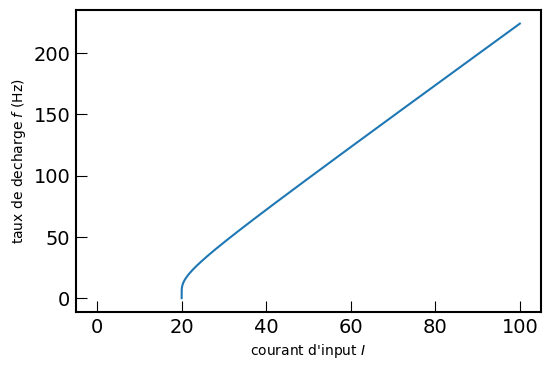

In [13]:
# importation de bibliothèques
import matplotlib.pyplot as plt
import numpy as np
# les graphes sont affichés dans le navigateur
%matplotlib inline 

I = np.linspace(0,100,10001)
tau = 0.02
R = 1.
Theta = 20.

def taux(I):
    return 1./(tau*np.log(R*I/(R*I - Theta)))

f = taux(I)

plt.plot(I,f)
plt.xlabel('courant d\'input $I$')
plt.ylabel('taux de decharge $f$ (Hz)')


## E1.3 Neurone Integrate-and-Fire avec retard

Considérons maintenant un neurone avec une période réfractaire (une période après le spike pendant laquelle il n'intègre pas d'inputs). La période réfractaire dure une durée $D$. Comment le taux de décharge $f(I)$ change-t-il avec une période réfractaire de $D=5$ ms? Quelle est la nouvelle expression pour $f(I)$? Aussi, tracer $f$ en fonction de $I$. <br> 
**Indice**: Dessinez d'abord un croquis de la dynamique du potentiel membranaire pour avoir une meilleure idée de la façon dont $D$ affecte $T$. 

# 2. Activité irrégulière des neurones corticaux

Dans le cortex, le timing des potentiels d'action successifs est très irrégulier. Le coefficient de variation des intervalles inter-spike est proche de 1, similaire à un processus de Poisson. Pour un processus de Poisson, la fonction de densité de probabilité pour le temps d'attente jusqu'au spike suivant est donnée par 
$$p(T) = f {\rm e}^{-f T}$$
Ici, $T$ est l'intervalle interspike, et $f$ est le taux de décharge. 
<p>
Ainsi, la densité de l'intervalle interspike pour un train de spike de Poisson homogène est une fonction exponentielle. Les intervalles d'interspike les plus probables sont courts et les intervalles longs ont une probabilité qui diminue de façon exponentielle en fonction de leur durée. Les histogrammes d'intervalles interspike peuvent être extraits des potentiels d'action en calculant la différence de temps entre tous les spikes successifs.  

## E2.1  Train de spike Poisson

Générez un train de spikes de Poisson du taux $f = 10$ spk/sec. Calculez la moyenne et l'écart type des intervalles interspike (ISI). Vérifier que le coefficient de variation (CV = écart type/moyenne) est égal à 1. Tracez l'histogramme des ISI. Comment un train de spikes peut-il être généré à partir des ISIs? 
<br>
**Indice:** Rappelez-vous que les intervalles d'interspike d'un train de spikes Poisson sont distribués de façon exponentielle.  À son tour, le train peut être généré en tirant des nombres aléatoires de la distribution exponentielle et en les traitant comme des intervalles interspike. Utilisez la fonction numpy `np.random.exponential()` pour tirer les nombres de la distribution exponentielle. 


# 3. Décharge irrégulière dans le modèle Integrate-and-Fire

Ajoutons une entrée de bruit à l'équation du neurone Integrate-and-Fire ci-dessus
$$\tau \frac{dV}{dt} = -V + RI + \sigma \sqrt{\tau} \xi(t),$$
où $\sigma$ détermine l'amplitude du bruit et $\xi(t)$ est un processus de bruit blanc gaussien avec une densité de variance unitaire et moyenne zéro.
<p>
Le terme de bruit peut représenter: 
 * Bruit réel:
  * bruit de canal
  * bruit synaptique (fiabilité de la transmission synaptique)
 * Entrées synaptiques externes (inconnues et/ou variables entre les essais).

Il est implémenté comme suit dans un schéma d'intégration numérique: 
 1. Tirez un nombre aléatoire $\eta$ pour chaque pas de temps à partir d'une distribution gaussienne avec une moyenne zéro et une variance unitaire. Ceci peut être réalisé en utilisant la fonction numpy suivante: `np.random.normal()`.
 2. Échellez ce nombre par la largeur de l'intervalle de temps : $\xi = \eta/\sqrt{dt}$
 3. Utilisez ce nombre dans l'équation différentielle. 

<p>
Considérons les paramètres: $\tau=20$ ms, $R=1$, $\Theta=20$.


## E3.1 Intégration numérique d'une équation différentielle stochastique: Integrate-and-Fire avec le bruit

Écrivez un schéma d'intégration numérique de l'équation différentielle ci-dessus. Utilisez la méthode Euler : $x(t+\Delta t) = x(t) +  \Delta t (dx/dt)$ avec un largeur de pas de temps de $0.1$ ms et intégrez pendant 500 secondes. Enregistrez les temps de spikes et calculez le coefficient de variation après l'intégration. Essayez d'obtenir un $CV$ de 1 à un taux de décharge de 1 spk/sec en variant $I$ et $\sigma$. Tracer le potentiel de la membrane pendant une période de 20 sec. Inspectez l'histogramme de la distribution ISI.  

